<!-- <img src='./pic/SharifUniLogo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br> -->

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Big Data - Massive Data Mining <br>
<font color=696080 size=5>
     Arxiv Article Dataset Analysis <br>
<font color=696880 size=4>
    Mohammad Ali Etemadi Naeen
    
____


## Dataset Link
[Arxiv Dataset download link](https://drive.google.com/file/d/1-EhpZaY5gvbgNuEU5IskmlQ0EnNAG5cu/view?usp=drive_link).

## Install Pypark & Initialization

In [2]:
!pip install pyspark
!pip install pyspark findspark
!pip install -U -q PyDrive2
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u432-ga~us1-0ubuntu2~22.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u432-ga~us1-0ub

In [ ]:
# !apt-get update
# !--fix-missing

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,425 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Get:13 http://security.ubuntu.com/ubuntu j

In [ ]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Arxiv_RDD_Analysis") \
    .master("local[*]") \
    .getOrCreate()

sc=spark.sparkContext

In [4]:
import json
import re
import string
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

## **Reading the data**

In [5]:
!mkdir /content/Dataset
!wget -O /content/Dataset/dataset.zip "https://drive.usercontent.google.com/download?id=1-EhpZaY5gvbgNuEU5IskmlQ0EnNAG5cu&export=download&authuser=0&confirm=t&uuid=d9c756e7-0845-424d-9307-f602df6237a3&at=AENtkXbdTL6Pt1nTip9nJbDLKRPp%3A1731422874583"
!unzip /content/Dataset/dataset.zip -d /content/Dataset/

--2024-11-21 15:09:41--  https://drive.usercontent.google.com/download?id=1-EhpZaY5gvbgNuEU5IskmlQ0EnNAG5cu&export=download&authuser=0&confirm=t&uuid=d9c756e7-0845-424d-9307-f602df6237a3&at=AENtkXbdTL6Pt1nTip9nJbDLKRPp%3A1731422874583
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1432555489 (1.3G) [application/octet-stream]
Saving to: ‘/content/Dataset/dataset.zip’

/content/Dataset/da 100%[===================>]   1.33G   113MB/s    in 12s     

2024-11-21 15:09:55 (115 MB/s) - ‘/content/Dataset/dataset.zip’ saved [1432555489/1432555489]

Archive:  /content/Dataset/dataset.zip
  inflating: /content/Dataset/content/drive/MyDrive/Data/Bigdata/MDA2024-Arxiv-Dataset.json  


In this section, we get familiar with the dataset structure and extract useful information from each column.
- parse the json string
- create a function that extracts and lists all fields (e.g., title, abstract, etc.) from the parsed RDD.

In [6]:
arxiv_rdd = sc.textFile("/content/Dataset/content/drive/MyDrive/Data/Bigdata/MDA2024-Arxiv-Dataset.json")

In [ ]:
arxiv_rdd.take(10)

['{"id":"0704.0001","submitter":"Pavel Nadolsky","authors":"C. Bal\\\\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan","title":"Calculation of prompt diphoton production cross sections at Tevatron and\\n  LHC energies","comments":"37 pages, 15 figures; published version","journal-ref":"Phys.Rev.D76:013009,2007","doi":"10.1103/PhysRevD.76.013009","report-no":"ANL-HEP-PR-07-12","categories":"hep-ph","license":null,"abstract":"  A fully differential calculation in perturbative quantum chromodynamics is\\npresented for the production of massive photon pairs at hadron colliders. All\\nnext-to-leading order perturbative contributions from quark-antiquark,\\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\\nall-orders resummation of initial-state gluon radiation valid at\\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\\nspecified in which the calculation is most reliable. Good agreement is\\ndemonstrated with data from the Fermilab Tevatro

In [7]:
def extract_fields(rdd):
    # Parse the JSON strings & extract all fields
    all_fields = rdd.flatMap(lambda line: json.loads(line).keys()).distinct().collect()
    return all_fields

fields = extract_fields(arxiv_rdd)
print("Unique fields in the dataset:", fields)


Unique fields in the dataset: ['categories', 'title', 'doi', 'versions', 'submitter', 'license', 'authors', 'update_date', 'report-no', 'journal-ref', 'abstract', 'id', 'authors_parsed', 'comments']


In [ ]:
print("count:", len(fields))

count: 14


## **Preprocessing**

In this section, we will clean the dataset by removing stop words and irrelevant characters to ensure the data is well-prepared for analysis.
- part 1: Identify and remove or impute any null values, especially in critical fields
- part 2: find and remove stopwords
- part 3: find and remove useless characters

### Part 1

In [8]:
critical_fields = ['title', 'abstract']
# critical_fields = ['title', 'abstract', 'license']

# Convert String to Dict
arxiv_rdd_modify = arxiv_rdd.map(lambda record: json.loads(record))

In [ ]:
arxiv_rdd_modify.take(5)


[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

##### Remove

In [ ]:
removed_rdd = arxiv_rdd_modify.filter(
    lambda record: all(record.get(field) is not None for field in critical_fields)
)

print("Count after removing nulls:", removed_rdd.count())

Count after removing nulls: 2586192


In [ ]:
removed_rdd.take(2)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

##### Imute

In [9]:
default_values = {
    # 'id': 'unknown_id',
    'title': 'unknown_title',
    'abstract': 'unknown_abstract',
    # 'license': 'unknown_license'
}


In [10]:
imputed_rdd = arxiv_rdd_modify.map(
    lambda record: {
        field: (record.get(field) if record.get(field) is not None else default_values.get(field, 'unknown'))
        for field in record
    }
)

imputed_rdd.take(3)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': 'unknown',
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated w

### Part 2: find and remove stopwords

In [11]:
# stopwords = {
#     "the", "and", "of", "to", "in", "a", "is", "for", "on", "with", "as", "by",
#     "an", "be", "are", "this", "that", "it", "from", "at", "or", "which", "we",
#     "these", "not", "but", "also", "has", "was", "will", "were", "can", "have",
#     "our", "its", "their"
# }

def remove_stopwords(text, stopwords):

    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]

    return ' '.join(filtered_words)


In [12]:
nltk.download('stopwords')
stopwords_english = stopwords.words('english')

# Remove stopwords
no_stopwords_rdd = imputed_rdd.map(lambda record: {
    **record,
    'title': remove_stopwords(record.get('title', ''), stopwords_english),
    'abstract': remove_stopwords(record.get('abstract', ''), stopwords_english)
})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
no_stopwords_rdd.take(3)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation prompt diphoton production cross sections Tevatron LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': 'unknown',
  'abstract': 'fully differential calculation perturbative quantum chromodynamics presented production massive photon pairs hadron colliders. next-to-leading order perturbative contributions quark-antiquark, gluon-(anti)quark, gluon-gluon subprocesses included, well all-orders resummation initial-state gluon radiation valid next-to-next-to-leading logarithmic accuracy. region phase space specified calculation reliable. Good agreement demonstrated data Fermilab Tevatron, predictions made detailed tests CDF data. Predictions shown distributions diphoton p

### Part 3: find and remove useless characters

In [13]:
def clean_dataset_text(text):

    translator = str.maketrans("", "", string.punctuation)
    text = text.translate(translator)

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    text = text.lower()

    text = re.sub(r'\s+', ' ', text).strip()

    return text


cleaned_rdd = no_stopwords_rdd.map(lambda record: {
    **record,
    'title': clean_dataset_text(record.get('title', '')),
    'abstract': clean_dataset_text(record.get('abstract', ''))
})

cleaned_rdd.take(3)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'calculation prompt diphoton production cross sections tevatron lhc energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': 'unknown',
  'abstract': 'fully differential calculation perturbative quantum chromodynamics presented production massive photon pairs hadron colliders nexttoleading order perturbative contributions quarkantiquark gluonantiquark gluongluon subprocesses included well allorders resummation initialstate gluon radiation valid nexttonexttoleading logarithmic accuracy region phase space specified calculation reliable good agreement demonstrated data fermilab tevatron predictions made detailed tests cdf data predictions shown distributions diphoton pairs produced energy 

## **Dataset Analysis**

- part 1: How many articles exist in each category (e.g., hep-ph, math.co)?
- part 2: Which category has the most articles?
- part 3 (**Bonus**): What is the distribution of the number of authors per article? (e.g., what percentage of articles have 1 author, more than 3 authors?)
- part 4 (**Bonus**): Filter out the articles that have more than 3 authors and generate a list of their titles and authors. Display the first 10 results.
- part 5: Plot a time series of the number of articles submitted per year.
- part 6: What are the 20 most frequent words in abstract?
- part 7: Visualize the frequently occurring words identified in the previous part by generating a Word Cloud.

### Part 1: Number of Articles in Each Category (e.g., hep-ph, math.co)

In [ ]:
# Extract categories from the dataset
category_counts = cleaned_rdd.flatMap(lambda record: record.get('categories', 'Unknown').split())
category_counts.take(10)

['hep-ph',
 'math.CO',
 'cs.CG',
 'physics.gen-ph',
 'math.CO',
 'math.CA',
 'math.FA',
 'cond-mat.mes-hall',
 'gr-qc',
 'cond-mat.mtrl-sci']

In [ ]:
# Map categories to a count of 1
category_counts = category_counts.map(lambda category: (category, 1))
category_counts.take(10)

[('hep-ph', 1),
 ('math.CO', 1),
 ('cs.CG', 1),
 ('physics.gen-ph', 1),
 ('math.CO', 1),
 ('math.CA', 1),
 ('math.FA', 1),
 ('cond-mat.mes-hall', 1),
 ('gr-qc', 1),
 ('cond-mat.mtrl-sci', 1)]

In [ ]:
# Reduce by category and sum the counts
category_counts = category_counts.reduceByKey(lambda x, y: x + y)
category_counts.take(5)

[('eess.SY', 25603),
 ('physics.class-ph', 8652),
 ('q-alg', 1578),
 ('math.OA', 12826),
 ('q-fin.PR', 1997)]

In [ ]:
category_counts = cleaned_rdd.flatMap(lambda record: record.get('categories', 'Unknown').split())

category_counts = category_counts.map(lambda category: (category, 1))

category_counts = category_counts.reduceByKey(lambda x, y: x + y)

results = category_counts.collect()

In [ ]:
results

[('eess.SY', 25603),
 ('physics.class-ph', 8652),
 ('q-alg', 1578),
 ('math.OA', 12826),
 ('q-fin.PR', 1997),
 ('astro-ph.SR', 61600),
 ('math.DG', 42912),
 ('physics.bio-ph', 15687),
 ('ao-sci', 17),
 ('math.QA', 19258),
 ('stat.ME', 28229),
 ('cs.HC', 19671),
 ('math.GT', 23234),
 ('bayes-an', 16),
 ('math.MP', 81102),
 ('cs.CV', 136057),
 ('math.SP', 9878),
 ('q-bio.SC', 1712),
 ('q-bio.MN', 3790),
 ('physics.comp-ph', 23501),
 ('cs.SC', 2632),
 ('cs.FL', 5112),
 ('eess.SP', 29913),
 ('nlin.CD', 15911),
 ('math.LO', 13585),
 ('cs.OS', 959),
 ('q-bio.CB', 2207),
 ('astro-ph', 105380),
 ('atom-ph', 123),
 ('nucl-ex', 26159),
 ('acc-phys', 49),
 ('physics.gen-ph', 10400),
 ('cs.PF', 4089),
 ('cs.NI', 22975),
 ('physics.acc-ph', 7898),
 ('cs.GL', 216),
 ('cs.LG', 192323),
 ('cs.OH', 2218),
 ('cs.GT', 11959),
 ('math.AT', 15962),
 ('physics.hist-ph', 5016),
 ('q-fin.MF', 2642),
 ('physics.geo-ph', 7349),
 ('stat.CO', 8520),
 ('astro-ph.IM', 30056),
 ('solv-int', 1413),
 ('cs.RO', 35722),

In [ ]:
# display the most 10 Categories
iter = 0

for category, count in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"Category: {category}, Count: {count}")
    iter = iter + 1

    if iter == 10:
        break

Category: cs.LG, Count: 192323
Category: hep-ph, Count: 182708
Category: hep-th, Count: 169048
Category: quant-ph, Count: 153349
Category: cs.CV, Count: 136057
Category: gr-qc, Count: 109582
Category: astro-ph, Count: 105380
Category: cs.AI, Count: 104032
Category: cond-mat.mtrl-sci, Count: 94738
Category: cond-mat.mes-hall, Count: 91985


> Number of "hep-ph", "math.co"

In [ ]:
# Number of 'hep-ph' & 'math.CO'
for category, count in sorted(results, key=lambda x: x[1], reverse=True):
    if category in ['hep-ph', 'math.CO']:
        print(f"Category: {category}, Count: {count}")

Category: hep-ph, Count: 182708
Category: math.CO, Count: 67880


### Part 2: Category with the Most Articles

In [ ]:
max_category = max(results, key=lambda x: x[1])

print(f"The category with the most articles is {max_category[0]} with {max_category[1]} articles.")

The category with the most articles is cs.LG with 192323 articles.


### Part 3: Distribution of the Number of Authors per Article and Their Respective Percentages

In [ ]:
# Extract the number of authors for each article
author_counts = cleaned_rdd.map(lambda x: len(re.split(r',|\sand\s', x['authors'].strip())) if isinstance(x['authors'], str) else 0)
author_counts.take(10)

[4, 2, 1, 1, 2, 2, 3, 1, 7, 1]

In [ ]:
cleaned_rdd.take(10)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'calculation prompt diphoton production cross sections tevatron lhc energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': 'unknown',
  'abstract': 'fully differential calculation perturbative quantum chromodynamics presented production massive photon pairs hadron colliders nexttoleading order perturbative contributions quarkantiquark gluonantiquark gluongluon subprocesses included well allorders resummation initialstate gluon radiation valid nexttonexttoleading logarithmic accuracy region phase space specified calculation reliable good agreement demonstrated data fermilab tevatron predictions made detailed tests cdf data predictions shown distributions diphoton pairs produced energy 

In [ ]:
author_distribution = author_counts.map(lambda count: (count, 1)).reduceByKey(lambda x, y: x + y)

results = author_distribution.collect()

total_articles = sum(count for _, count in results)

author_percentage = [(count, (percentage / total_articles) * 100) for count, percentage in results]

for count, percentage in sorted(author_percentage, key=lambda x: x[0]):
    print(f"Articles with {count} author(s): {percentage:.2f}%")


Articles with 1 author(s): 18.69%
Articles with 2 author(s): 24.09%
Articles with 3 author(s): 18.03%
Articles with 4 author(s): 13.78%
Articles with 5 author(s): 8.22%
Articles with 6 author(s): 5.07%
Articles with 7 author(s): 3.14%
Articles with 8 author(s): 2.06%
Articles with 9 author(s): 1.40%
Articles with 10 author(s): 0.98%
Articles with 11 author(s): 0.73%
Articles with 12 author(s): 0.56%
Articles with 13 author(s): 0.42%
Articles with 14 author(s): 0.33%
Articles with 15 author(s): 0.27%
Articles with 16 author(s): 0.22%
Articles with 17 author(s): 0.18%
Articles with 18 author(s): 0.15%
Articles with 19 author(s): 0.13%
Articles with 20 author(s): 0.12%
Articles with 21 author(s): 0.10%
Articles with 22 author(s): 0.09%
Articles with 23 author(s): 0.08%
Articles with 24 author(s): 0.07%
Articles with 25 author(s): 0.06%
Articles with 26 author(s): 0.05%
Articles with 27 author(s): 0.05%
Articles with 28 author(s): 0.04%
Articles with 29 author(s): 0.04%
Articles with 30 au

In [ ]:
# Map to the appropriate bucket
def bucket_authors(count):
    if count == 1:
        return (1, 1)
    elif count == 2:
        return (2, 1)
    elif count == 3:
        return (3, 1)
    elif count == 4:
        return (4, 1)
    elif count == 5:
        return (5, 1)
    # elif 3 <= count <= 5:
    #     return (3, 1)
    # elif 6 <= count <= 10:
    #     return (6, 1)
    else:
        return (6, 1)

author_buckets = author_counts.map(lambda count: bucket_authors(count))

author_distribution = author_buckets.reduceByKey(lambda x, y: x + y)

results = author_distribution.collect()

total_articles = sum(count for _, count in results)

author_percentage = [(bucket, (percentage / total_articles) * 100) for bucket, percentage in results]

for bucket, percentage in sorted(author_percentage, key=lambda x: x[0]):
    if bucket == 1:
        label = "1 author"
    elif bucket == 2:
        label = "2 authors"
    elif bucket == 3:
        label = "3 authors"
    elif bucket == 4:
        label = "4 authors"
    elif bucket == 5:
        label = "5 authors"
    else:
        label = "More than 6 authors"

    print(f"Articles with {label}: {percentage:.2f}%")


Articles with 1 author: 18.69%
Articles with 2 authors: 24.09%
Articles with 3 authors: 18.03%
Articles with 4 authors: 13.78%
Articles with 5 authors: 8.22%
Articles with More than 6 authors: 17.18%


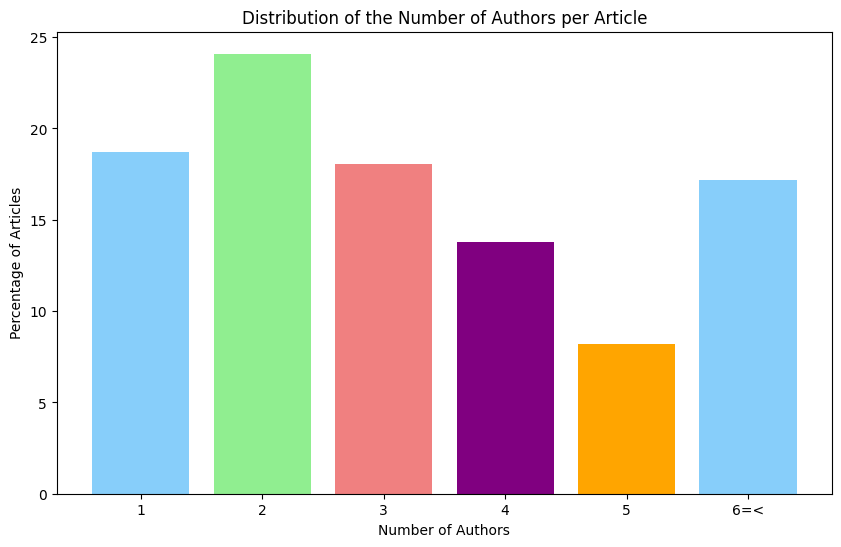

In [ ]:
author_counts_list = [count for count, _ in sorted(author_percentage, key=lambda x: x[0])]
author_percentages = [percentage for _, percentage in sorted(author_percentage, key=lambda x: x[0])]

author_counts_list[-1] = str(author_counts_list[-1]) + "=<"

# Plot
plt.figure(figsize=(10, 6))

bar_width = 0.8
positions = np.arange(len(author_counts_list))

plt.bar(positions, author_percentages, width=bar_width, color=['lightskyblue', 'lightgreen', 'lightcoral', 'purple', 'orange'])
plt.xlabel('Number of Authors')
plt.ylabel('Percentage of Articles')
plt.title('Distribution of the Number of Authors per Article')
plt.xticks(positions, author_counts_list)

plt.show()

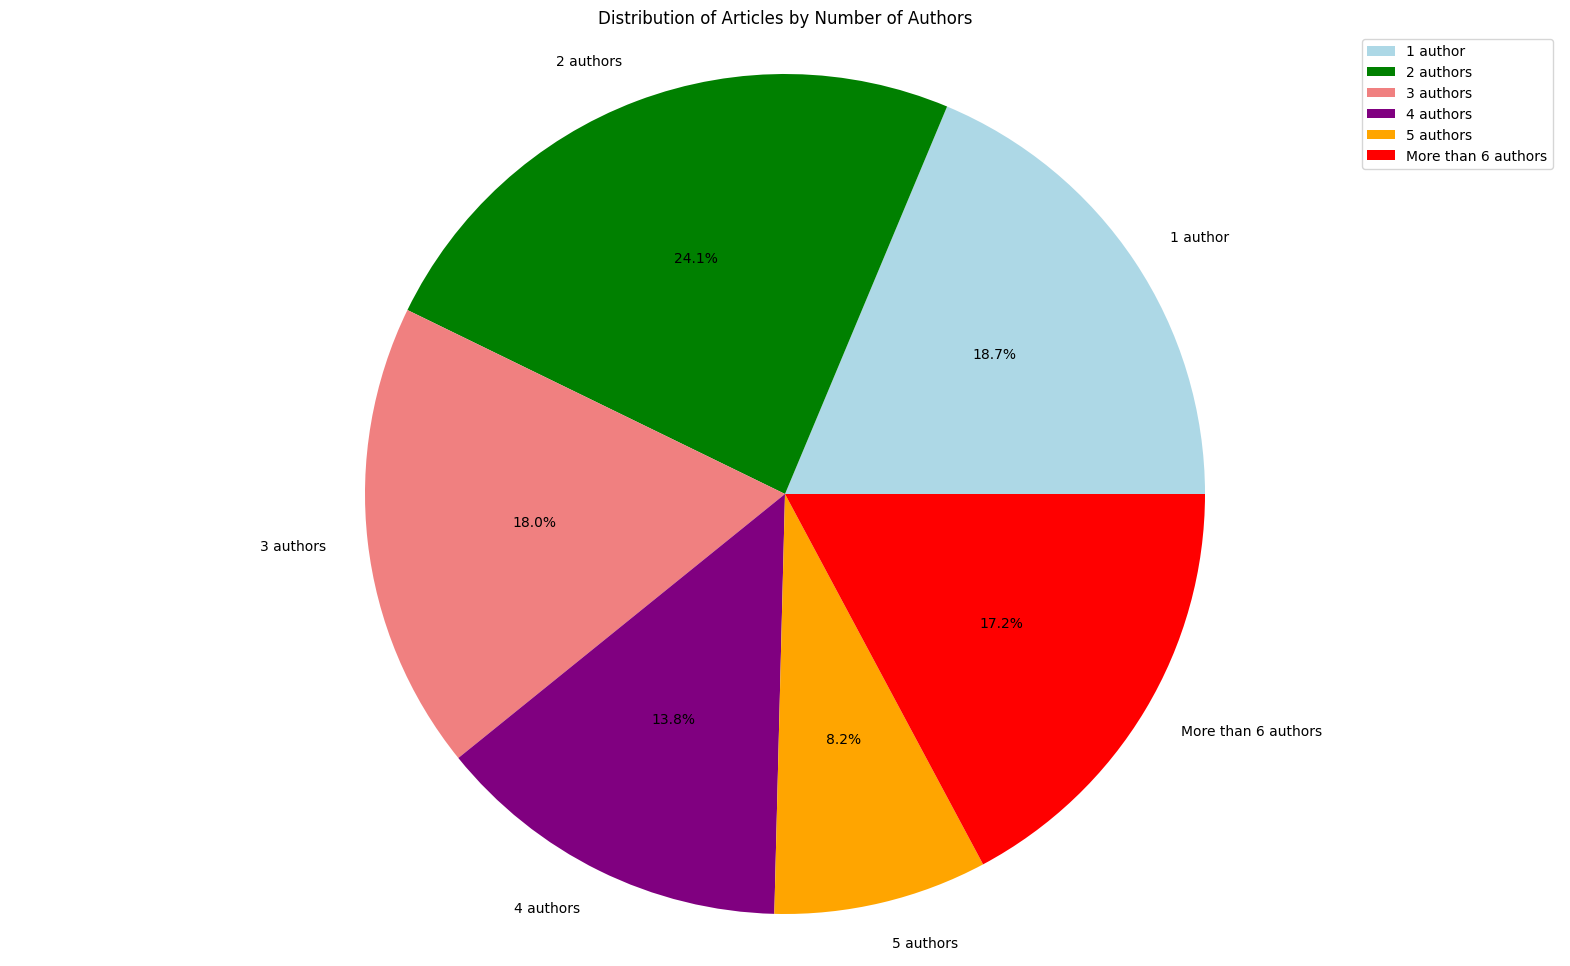

In [ ]:
# Plot Pi Chart
categories = ['1 author', '2 authors', '3 authors', '4 authors', '5 authors', 'More than 6 authors']
counts = [0, 0, 0, 0, 0, 0]

for bucket, count in results:
    if bucket == 1:
        counts[0] = count
    elif bucket == 2:
        counts[1] = count
    elif bucket == 3:
        counts[2] = count
    elif bucket == 4:
        counts[3] = count
    elif bucket == 5:
        counts[4] = count
    else:
        counts[5] = count

plt.figure(figsize=(20, 12))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=['lightblue', 'green', 'lightcoral', 'purple', 'orange', 'red'])
plt.title('Distribution of Articles by Number of Authors')
plt.axis('equal')
plt.legend()
# plt.tight_layout()
plt.show()


### Part 4: Filter articles with more than 3 authors and display the first 10 titles and authors

In [ ]:
# Filter articles with more than 3 authors
articles_with_more_than_3_authors = cleaned_rdd.filter(lambda x: len(re.split(r',|\sand\s', x['authors'].strip())) > 3 if isinstance(x['authors'], str) else 0)

titles_and_authors = articles_with_more_than_3_authors.map(lambda record: (record.get('title', 'No Title'), record.get('authors', 'No Authors')))

articles_authors = titles_and_authors.take(10)

for i, (title, authors) in enumerate(articles_authors, 1):
    print(f"{i}. Title: {title}")
    print(f"   Authors: {authors}\n")


1. Title: calculation prompt diphoton production cross sections tevatron lhc energies
   Authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan

2. Title: spitzer c2d survey large nearby insterstellar clouds ix serpens yso population observed irac mips
   Authors: Paul Harvey, Bruno Merin, Tracy L. Huard, Luisa M. Rebull, Nicholas
  Chapman, Neal J. Evans II, Philip C. Myers

3. Title: lifetime doubly charmed baryons
   Authors: Chao-Hsi Chang, Tong Li, Xue-Qian Li and Yu-Ming Wang

4. Title: spectroscopic observations intermediate polar ex hydrae quiescence
   Authors: Nceba Mhlahlo, David H. Buckley, Vikram S. Dhillon, Steven B. Potter,
  Brian Warner and Patric A. Woudt

5. Title: formation quasisolitons transverse confined ferromagnetic film media
   Authors: A.A. Serga, M. Kostylev, and B. Hillebrands

6. Title: spectroscopic properties polarons strongly correlated systems exact diagrammatic monte carlo method
   Authors: A. S. Mishchenko (1 and 2) and N. Nagaosa (1 and 3)

In [ ]:
articles_data = articles_with_more_than_3_authors.map(
    lambda record: (
        record.get('id', 'No ID'),
        record.get('title', 'No Title'),
        record.get('authors', 'No Authors'),
        len(re.split(r',|\sand\s', record['authors'].strip())) if isinstance(record['authors'], str) else 0
    )
)

table_result = articles_data.take(10)

print(f"{'ID':<10} | {'Title':<70} | {'Authors':<60} | {'Number of Authors'}")
print("-" * 180)
for id_, title, authors, num_authors in table_result:
    print(f"{id_:<10} | {title[:67]:<70} | {authors[:57]:<60} | {num_authors}")


ID         | Title                                                                  | Authors                                                      | Number of Authors
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0704.0001  | calculation prompt diphoton production cross sections tevatron lhc     | C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan        | 4
0704.0009  | spitzer c2d survey large nearby insterstellar clouds ix serpens yso    | Paul Harvey, Bruno Merin, Tracy L. Huard, Luisa M. Rebull    | 7
0704.0016  | lifetime doubly charmed baryons                                        | Chao-Hsi Chang, Tong Li, Xue-Qian Li and Yu-Ming Wang        | 4
0704.0017  | spectroscopic observations intermediate polar ex hydrae quiescence     | Nceba Mhlahlo, David H. Buckley, Vikram S. Dhillon, Steve    | 6
0704.0024  | formation quasisolitons transverse 

### Part 5: Time Series Plot of the Number of Articles Submitted Per Year

In [14]:
def extract_dates(article):

    id = article['id']
    # first_date = article['versions'][0]['created']
    year = article['update_date']
    # second_date = article['versions'][1]['created']
    # return (id, first_date, second_date)
    return (id, year)

dates_rdd = cleaned_rdd.map(extract_dates)

results_dates = dates_rdd.collect()

In [ ]:
# display 50 Articles Dates
iter = 0

for result in results_dates:
    print(f"ID: {result[0]}, Year: {result[1]}")
    iter = iter + 1

    if iter == 50:
        break

ID: 0704.0001, Year: 2008-11-26
ID: 0704.0002, Year: 2008-12-13
ID: 0704.0003, Year: 2008-01-13
ID: 0704.0004, Year: 2007-05-23
ID: 0704.0005, Year: 2013-10-15
ID: 0704.0006, Year: 2015-05-13
ID: 0704.0007, Year: 2008-11-26
ID: 0704.0008, Year: 2009-02-05
ID: 0704.0009, Year: 2010-03-18
ID: 0704.0010, Year: 2007-05-23
ID: 0704.0011, Year: 2008-08-20
ID: 0704.0012, Year: 2007-05-23
ID: 0704.0013, Year: 2008-05-26
ID: 0704.0014, Year: 2009-09-29
ID: 0704.0015, Year: 2009-11-13
ID: 0704.0016, Year: 2008-12-18
ID: 0704.0017, Year: 2009-06-23
ID: 0704.0018, Year: 2007-05-23
ID: 0704.0019, Year: 2007-06-23
ID: 0704.0020, Year: 2015-06-30
ID: 0704.0021, Year: 2007-07-24
ID: 0704.0022, Year: 2007-10-16
ID: 0704.0023, Year: 2009-06-23
ID: 0704.0024, Year: 2007-05-30
ID: 0704.0025, Year: 2015-05-13
ID: 0704.0026, Year: 2007-11-22
ID: 0704.0027, Year: 2009-09-24
ID: 0704.0028, Year: 2014-07-31
ID: 0704.0029, Year: 2010-04-23
ID: 0704.0030, Year: 2015-05-13
ID: 0704.0031, Year: 2008-11-26
ID: 0704

In [ ]:
dates_rdd.take(4)

[('0704.0001', '2008-11-26'),
 ('0704.0002', '2008-12-13'),
 ('0704.0003', '2008-01-13'),
 ('0704.0004', '2007-05-23')]

In [15]:
# Extract the Year
years_rdd = dates_rdd.map(lambda x: x[1][:4])

year_counts_rdd = years_rdd.map(lambda year: (year, 1)) \
                           .reduceByKey(lambda a, b: a + b)

sorted_year_counts = year_counts_rdd.sortByKey().collect()

years, counts = zip(*sorted_year_counts)

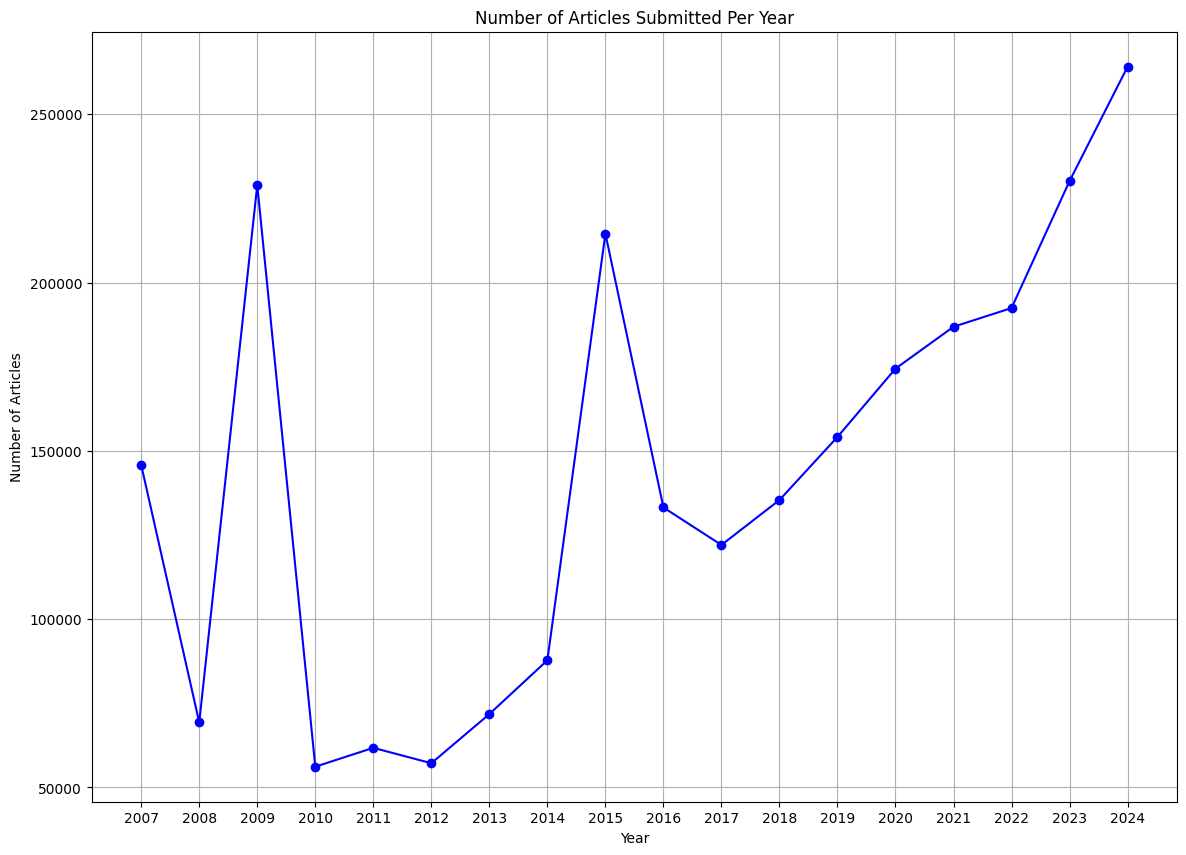

In [19]:
plt.figure(figsize=(14, 10))
plt.plot(years, counts, marker='o', color='blue')
plt.title('Number of Articles Submitted Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()

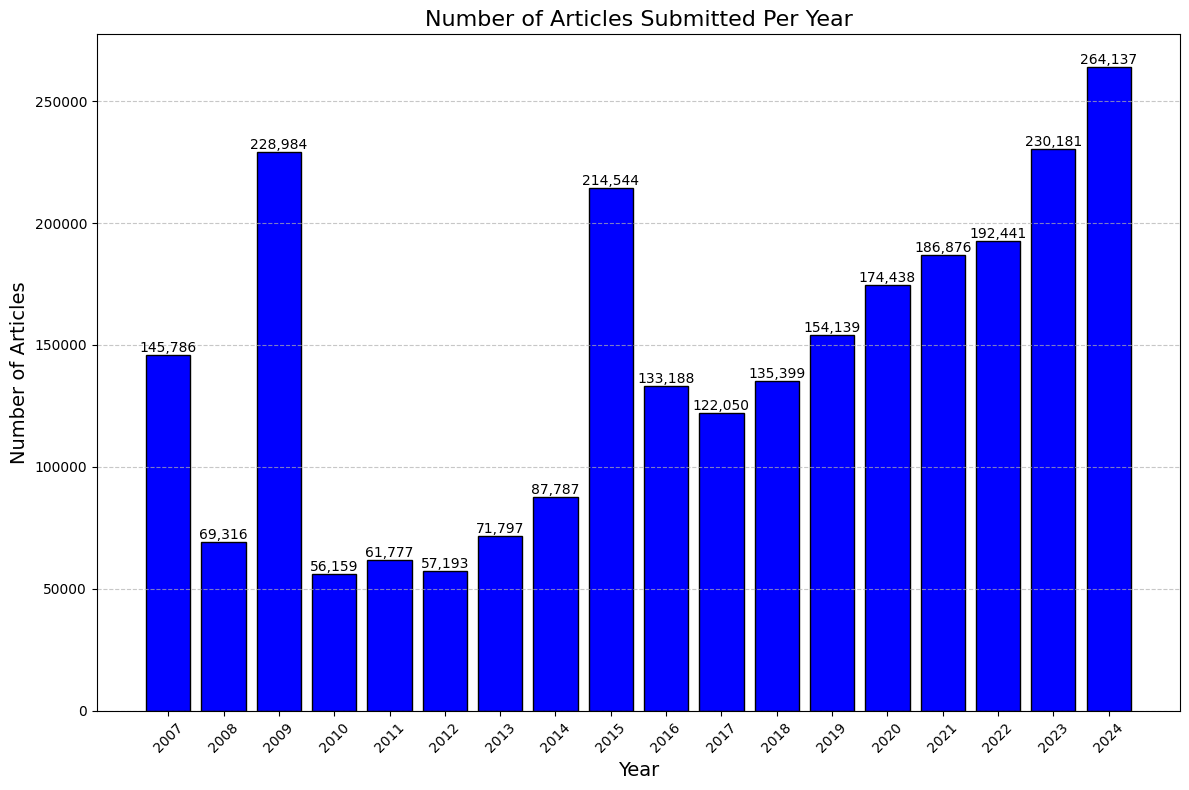

In [18]:
# Bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(years, counts, color='blue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:,}', ha='center', va='bottom', fontsize=10)

plt.title('Number of Articles Submitted Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Part 6: Top 20 Most Frequent Words in Abstracts

In [ ]:
abstracts_rdd = cleaned_rdd.map(lambda record: record.get("abstract", "").lower())

words_rdd = abstracts_rdd.flatMap(lambda text: text.split())

word_counts = words_rdd.map(lambda word: (word, 1)).reduceByKey(lambda x, y: x + y)

# Sort words & get the top 20
top_20_words = word_counts.sortBy(lambda x: x[1], ascending=False).take(20)

print("Top 20 Most Frequent Words in Abstracts:")
for word, count in top_20_words:
    print(f"{word}: {count}")

Top 20 Most Frequent Words in Abstracts:
model: 1188676
data: 917131
results: 859049
show: 831879
using: 809828
also: 774216
two: 719284
models: 686537
paper: 650231
study: 596891
method: 596084
quantum: 573410
system: 559067
new: 550050
field: 544587
based: 527532
one: 518005
time: 506071
different: 497350
present: 477899


### Part 7: Visualizing Frequently Occurring Words in Abstracts Using a Word Cloud

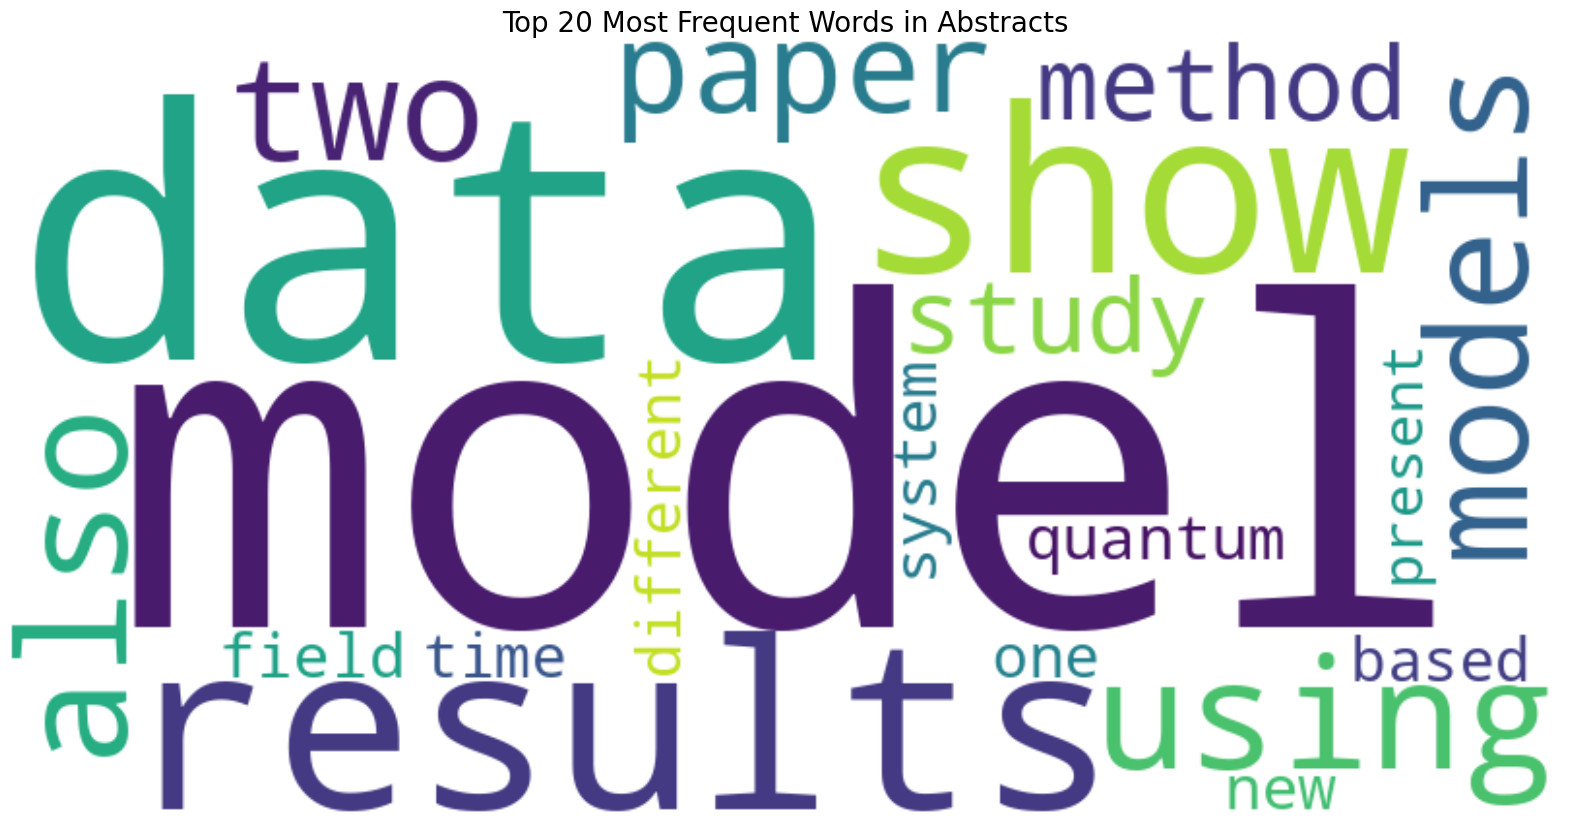

In [ ]:
word_freq_dict = {word: count for word, count in top_20_words}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the Word Cloud for top 20 words
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 20 Most Frequent Words in Abstracts", fontsize=20)
plt.show()


## **Advanced Data Exploration**

### Part 1: find articles that contain the word "algorithm" in their abstract.

In [ ]:
algorithm_articles_rdd = cleaned_rdd.filter(lambda article: "algorithm" in article.get('abstract', '').lower())

algorithm_articles = algorithm_articles_rdd.collect()

print(f"Number of articles containing 'algorithm': {len(algorithm_articles)}\n")
for article in algorithm_articles[:5]:
    print(f"ID: {article['id']}")
    print(f"Title: {article['title']}")
    print(f"Abstract: {article['abstract']}\n")


Number of articles containing 'algorithm': 256498

ID: 0704.0002
Title: Sparsitycertifying Graph Decompositions
Abstract: We describe new algorithm kellpebble game colors use it obtain characterization family kellsparse graphs algorithmic solutions family problems concerning tree decompositions graphs Special instances sparse graphs appear rigidity theory have received increased attention recent years particular our colored pebbles generalize strengthen previous results Lee Streinu give new proof TutteNashWilliams characterization arboricity We also present new decomposition that certifies sparsity based kellpebble game colors Our work also exposes connections between pebble game algorithms previous sparse graph algorithms Gabow Gabow Westermann Hendrickson

ID: 0704.0011
Title: Computing genus 2 HilbertSiegel modular forms over Qsqrt5 via JacquetLanglands correspondence
Abstract: this paper we present algorithm computing Hecke eigensystems HilbertSiegel cusp forms over real quadratic 

### Part 2: Count the Number of Words in Each Article's Abstract for Articles Containing "Algorithm"

In [ ]:
abstract_word_counts_rdd = algorithm_articles_rdd.map(
    lambda article: (article['id'], article['title'], len(article.get('abstract', '').split()))
)

abstract_word_counts = abstract_word_counts_rdd.collect()

print("Word counts in abstracts of articles containing 'algorithm':\n")
for article_id, title, word_count in abstract_word_counts[:5]:
    print(f"ID: {article_id}")
    print(f"Title: {title}")
    print(f"Word Count: {word_count}\n")


Word counts in abstracts of articles containing 'algorithm':

ID: 0704.0002
Title: Sparsitycertifying Graph Decompositions
Word Count: 80

ID: 0704.0011
Title: Computing genus 2 HilbertSiegel modular forms over Qsqrt5 via JacquetLanglands correspondence
Word Count: 40

ID: 0704.0049
Title: algorithm classification smooth Fano polytopes
Word Count: 43

ID: 0704.0062
Title: Online Viterbi Algorithm Its Relationship Random Walks
Word Count: 85

ID: 0704.0090
Title: Real Options Project Schedules ROPS
Word Count: 59



### Part 3: Sorting Articles by Abstract Word Count and Displaying the Top Five with the Highest Counts

In [ ]:
sorted_abstracts_rdd = abstract_word_counts_rdd.sortBy(lambda x: x[2], ascending=False)

top_5_abstracts = sorted_abstracts_rdd.take(5)

print("Top 5 articles with the highest word counts in their abstracts:\n")
for article_id, title, word_count in top_5_abstracts:
    print(f"ID: {article_id}")
    print(f"Title: {title}")
    print(f"Word Count: {word_count}\n")


Top 5 articles with the highest word counts in their abstracts:

ID: 2105.12210
Title: Nonlinearity Coefficient Practical Guide Neural Architecture Design
Word Count: 367

ID: 2212.05468
Title: McMini Programmable DPORBased Model Checker Multithreaded Programs
Word Count: 358

ID: 1401.3466
Title: Anytime Algorithm Optimal Coalition Structure Generation
Word Count: 347

ID: 1311.7224
Title: Predicting steady state thickness passive films Point Defect Model fretting corrosion experiments
Word Count: 343

ID: 1003.2357
Title: Boxicity Poset Dimension
Word Count: 342

